In [1]:
# Link Trabalho Final : https://www.dropbox.com/s/3fla2xuc8t9xba2/Deep%20Learning%20-%20Lista%20de%20Exerc%C3%ADcios%20v1.4.pdf?dl=0

In [2]:
# Importando as bibliotecas
import keras
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
#from keras.utils import plot_model
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf
import pandas as pd
import os.path
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import ModelCheckpoint   


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
# Verificando se o df existe

#!ls -larth '/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/heart.csv'
file_path = 'D:\__Projetos_\_MBA\DeepLearning\deep_learning_final_17ia\dados\heart.csv'

if os.path.exists(file_path) :
    print("Arquivo Existe")

Arquivo Existe


In [5]:
# Importando dados de Heart

#heart_csv = pd.read_csv('/content/drive/MyDrive/__FIAP/MBA - 17IA/Deep Learning & Reinforcement Learning/dados_trabalho_final/heart.csv')
heart_csv = pd.read_csv(file_path)

In [6]:
print("Shape:",heart_csv.shape)
heart_csv.head(5)

Shape: (303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_csv.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
heart_csv.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

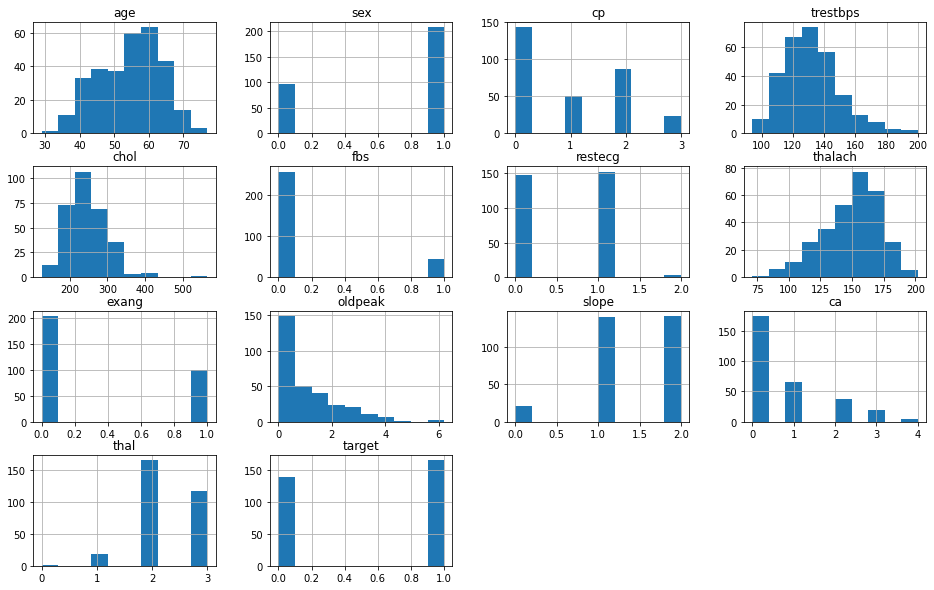

In [9]:
hist = heart_csv.hist(bins=10, figsize=(16,10))

In [10]:
# Separando dados em X e Y
X= heart_csv.drop('target',axis=1).to_numpy()
Y= heart_csv['target'].to_numpy()
print(X.shape, Y.shape, heart_csv.columns)

X_train,X_test,y_train, y_test = train_test_split(X,Y,test_size = 0.3 , random_state = 0)
X_train,X_valid,y_train, y_valid = train_test_split(X_train,y_train,test_size = 0.3 , random_state = 0)

(303, 13) (303,) Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [11]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_valid = sc.transform(X_valid)

In [12]:
print("Shape df:",heart_csv.shape)

print("Shape X_train:",X_train.shape)
print("Shape X_test:",X_test.shape)
print("Shape X_valid:",X_valid.shape)
print("Shape y_train:",y_train.shape)
print("Shape y_test:",y_test.shape)
print("Shape y_valid:",y_valid.shape)
type(X_train)

Shape df: (303, 14)
Shape X_train: (148, 13)
Shape X_test: (91, 13)
Shape X_valid: (64, 13)
Shape y_train: (148,)
Shape y_test: (91,)
Shape y_valid: (64,)


numpy.ndarray

In [13]:
modelo = Sequential()
modelo.add(Dense(12, activation = "relu", input_dim = 13, kernel_initializer = "uniform"))
modelo.add(Dense(6, activation = "relu",
                     kernel_initializer = "uniform"))
modelo.add(Dropout(0.2))
modelo.add(Dense(1, activation = "relu",
                     kernel_initializer = "uniform"))
modelo.add(Dropout(0.2))
modelo.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 78        
_________________________________________________________________
dropout (Dropout)            (None, 6)                 0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1)                 0         
Total params: 253
Trainable params: 253
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Criando modelo com checkpoint automático

checkpointer = ModelCheckpoint(filepath='checkpoint_3-2.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')
# checkpointer = ModelCheckpoint(filepath='teste.hdf5', verbose=1,  save_best_only=True, monitor='val_accuracy')

hist = modelo.fit(X_train, y_train, batch_size=15, epochs=50, validation_data=(X_valid, y_valid), callbacks=[checkpointer], verbose=1, shuffle=True)

Epoch 1/50
 1/10 [==>...........................] - ETA: 0s - loss: 10.4201 - accuracy: 0.2667
Epoch 00001: val_accuracy improved from -inf to 0.46875, saving model to checkpoint_3-2.hdf5
10/10 [==============================] - 0s 14ms/step - loss: 4.7082 - accuracy: 0.4324 - val_loss: 2.8404 - val_accuracy: 0.4688
Epoch 2/50
 1/10 [==>...........................] - ETA: 0s - loss: 3.4041 - accuracy: 0.3333
Epoch 00002: val_accuracy did not improve from 0.46875
10/10 [==============================] - 0s 2ms/step - loss: 3.7154 - accuracy: 0.4324 - val_loss: 2.6123 - val_accuracy: 0.4688
Epoch 3/50
 1/10 [==>...........................] - ETA: 0s - loss: 1.2615 - accuracy: 0.7333
Epoch 00003: val_accuracy did not improve from 0.46875
10/10 [==============================] - 0s 2ms/step - loss: 3.7462 - accuracy: 0.4324 - val_loss: 2.4499 - val_accuracy: 0.4688
Epoch 4/50
 1/10 [==>...........................] - ETA: 0s - loss: 3.8255 - accuracy: 0.4667
Epoch 00004: val_accuracy did no

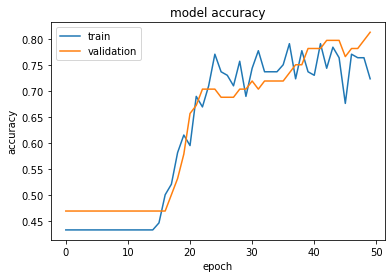

In [15]:
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [16]:
scores = modelo.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

3/3 [==============================] - 0s 665us/step - loss: 0.5698 - accuracy: 0.8022

accuracy: 80.22%


In [17]:
scores = modelo.evaluate(X_train, y_train)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

5/5 [==============================] - 0s 399us/step - loss: 0.3172 - accuracy: 0.8919

accuracy: 89.19%


In [18]:
scores = modelo.evaluate(X_valid, y_valid)
print("\n%s: %.2f%%" % (modelo.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 513us/step - loss: 0.6365 - accuracy: 0.8125

accuracy: 81.25%
